# LSTM Time Series - Stock Price Prediction
## Part 1 - Data Explanatory Analysis
This notebook focuses on examining the raw dataset containing daily historical prices of Google stocks. The goal is to identify a specific timeframe suitable for further analysis and prediction using LSTM.

> **INPUT**: The raw data file of all available stock prices of Google (Alphabet Inc.), as downloaded from its original source. <br/>
> **OUTPUT**: The extracted historical data of the targeted period for analysis, stored in an intermediary location for next steps.

### 1. INITIALIZATION

In [2]:
#@title **Initialization**

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

### 2. LOAD DATASET FILE

The dataset we are going to initially load and explore is the historical records of daily price details of Google (Alphabet Inc.) sourced from [Yahoo Finance](https://finance.yahoo.com/quote/GOOG).

At first, we load the complete dataset available spanning a period from 2004-08-19 up until the time of creating this script.

The main objective of loading the entire dataset is to choose a particular time frame for analysis.

In [8]:
#@title **Load Data**

# Loading the Data file
data = pd.read_csv('/Users/pavankumar/Projects/LSTM-stock-price-prediction/data/raw/google_stock_price_full.csv')

# Check dataset shape
data.shape

(4940, 7)

In [5]:
# Check dataset head
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512


In [9]:
# Check Data Types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4940 entries, 0 to 4939
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4940 non-null   object 
 1   Open       4940 non-null   float64
 2   High       4940 non-null   float64
 3   Low        4940 non-null   float64
 4   Close      4940 non-null   float64
 5   Adj Close  4940 non-null   float64
 6   Volume     4940 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 270.3+ KB


### 3. INITIAL DATA CLEANING
As we notice, the Date column is currently in a String format which requires conversion to proper Datetime format.

In [24]:
#@title **Data Manupulation**

# Converting Date Column to a valid Datetime Format
data["Date"] = pd.to_datetime(data["Date"])

In [12]:
# Check column format
data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

### 4. EXPLORE DATASET

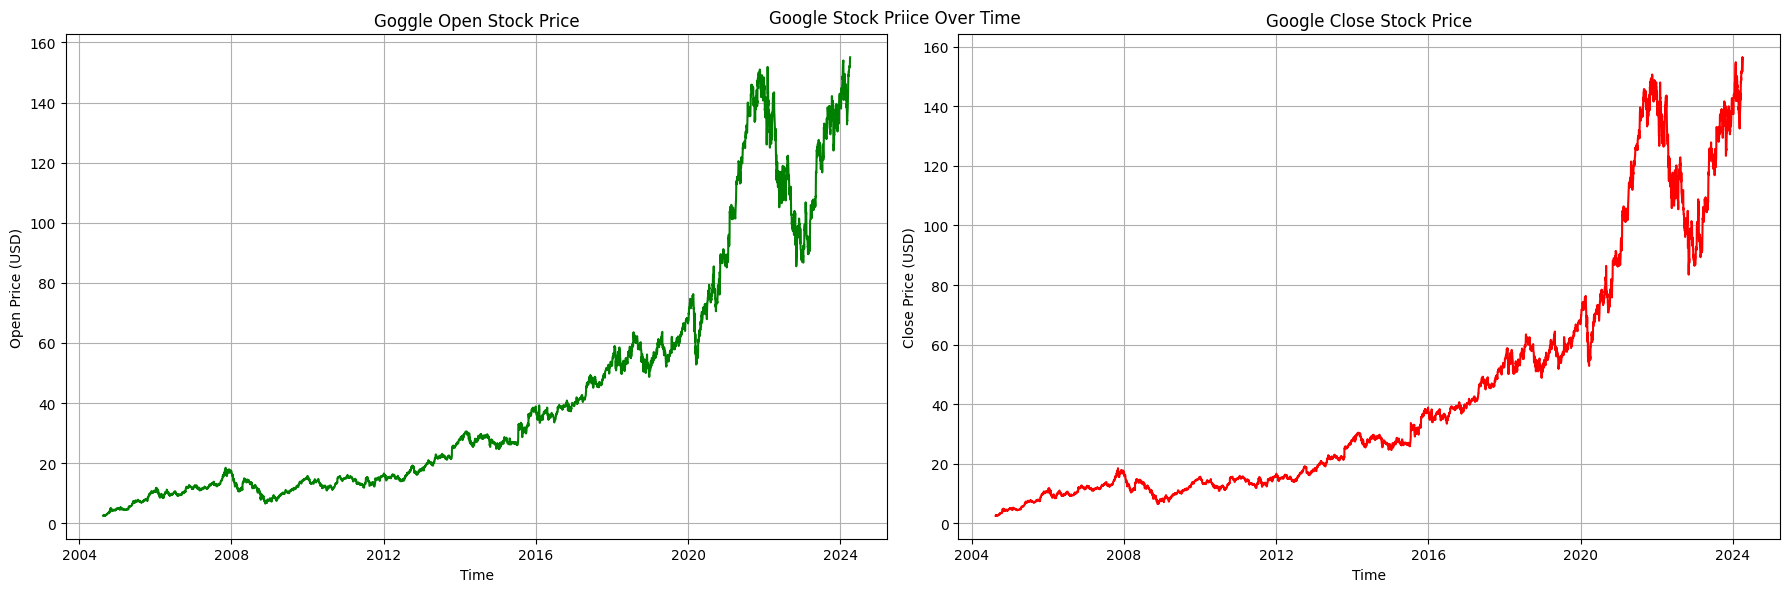

In [25]:
#@title **EXPLORE DATASET (EDA)**

# Plot Open and Close Price for the Whole period
plt.figure(figsize = (18,6))

plt.subplot(1,2,1)
plt.plot(data['Date'], data["Open"], color = 'green')
plt.xlabel("Time")
plt.ylabel("Open Price (USD)")
plt.title("Goggle Open Stock Price")
plt.tight_layout()
plt.grid()

plt.subplot(1,2,2)
plt.plot(data['Date'], data["Close"], color = 'red')
plt.xlabel("Time")
plt.ylabel("Close Price (USD)")
plt.title("Google Close Stock Price")
plt.tight_layout()
plt.grid()

plt.suptitle("Google Stock Priice Over Time")
plt.show()

The previous charts show an inconsistent behavior in the stock's performance over time, with a completely distinct trend during the past five years.

This means that the old historical data might not be relevant to the predictions, since it's most likely to represents a different period with outdated indicators that don't affect the current trend.

Accordingly, we will concentrate our analysis on the most recent five-year data, as it is expected to provide more accurate insights for predicting future trends.

In [17]:
# Select Stock price records for the last five years, starting from 2019
data_5_years = data[data["Date"].dt.year >= 2019]

# Check filtered data shape
data_5_years.shape

(1323, 7)

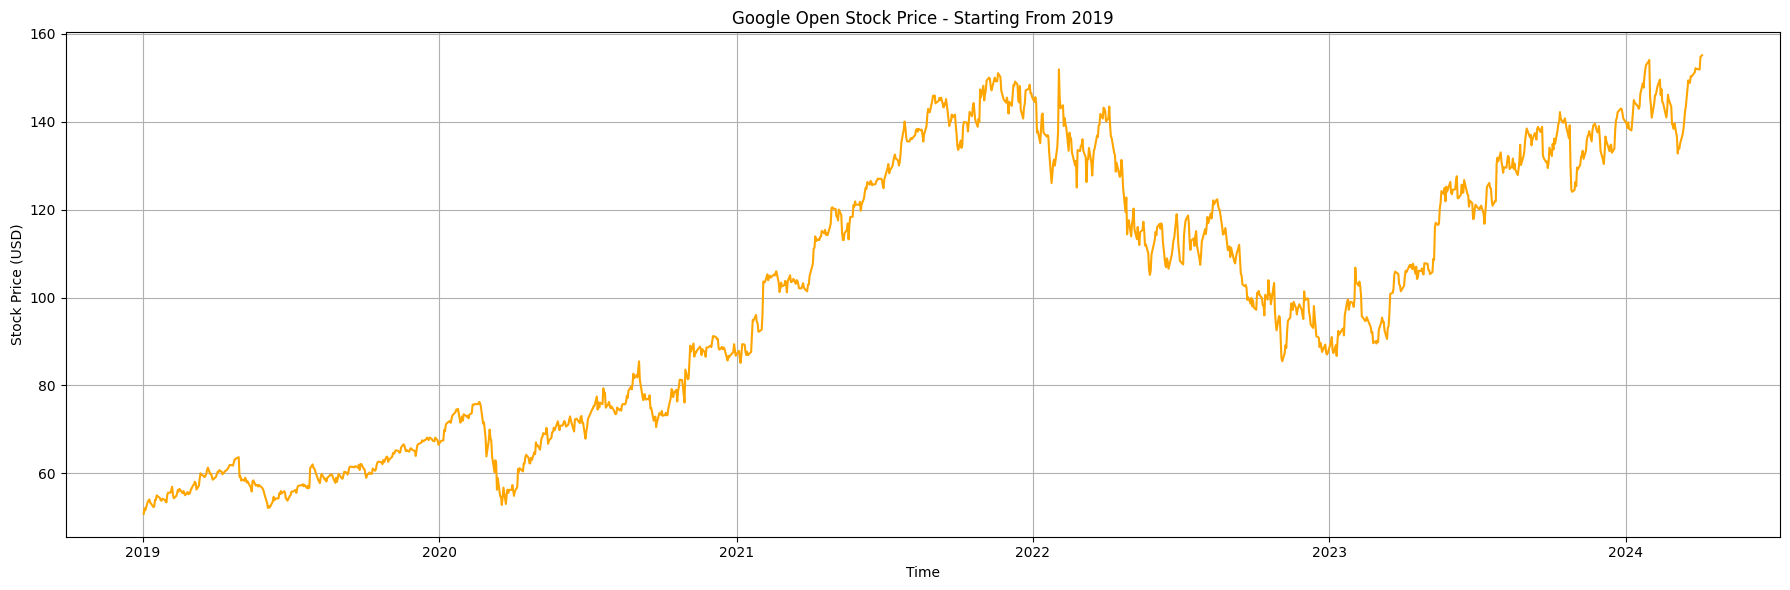

In [21]:
#@title ** stock prce performance in the last 5 years  (EDA)**

# Plot Open stock prce performance in the last five years
plt.figure(figsize = (18,6))
plt.plot(data_5_years["Date"], data_5_years["Open"], color = 'orange')
plt.xlabel("Time")
plt.ylabel("Stock Price (USD)")
plt.title("Google Open Stock Price - Starting From 2019")
plt.tight_layout()
plt.grid()

The selected period seems to be more relevant for analysis, as it's more likely to drive the stock performance with the impact of other external factors.

### 5. STORE FILTERED DATASET

In [26]:
#@title **Store Filtered Data **

# Preparing Data File Location
location = "..//data/filtered/"
file_name = "google_stock_price_5_years"
file_ext = "csv"

# Store The Filtered Data
data_5_years.to_csv(location + file_name + "." + file_ext, index = None)